<a href="https://colab.research.google.com/github/Areefahnk/All-the-stars-are-closer-AI-ML/blob/main/Build_Your_ML_Classifier_BTS_Teachable_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Universal Image Classification Notebook
# Author: Gradstellar
# Description: This notebook can be used for any multi-class image classification use case.
# Students just need to replace dataset paths and class names.

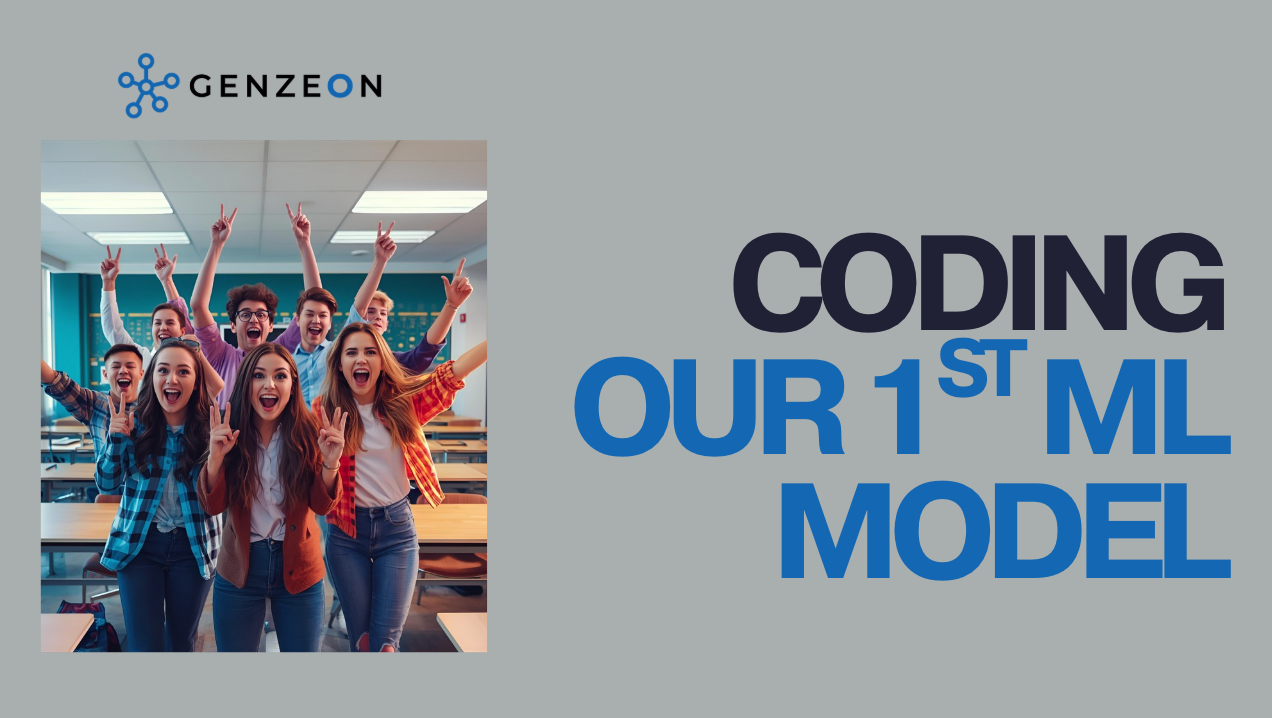

## ***Lets pull some Libraries asking our Librarian***

Here, we are installing TensorFlow and Matplotlib.

TensorFlow is a powerful library created by Google that lets us build and train AI models.

Keras is part of TensorFlow and makes building neural networks super easy, like using LEGO blocks instead of building from scratch.

Matplotlib is a library that helps us draw graphs, so we can see how our model is learning over time.

In [1]:
# Step 1: Install dependencies (if running on Colab)
!pip install tensorflow matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 839.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 136.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


## ***Knowledge about the libraries***

**tensorflow as tf** → we will use tf to access all TensorFlow features.

**ImageDataGenerator** → a helper that loads images and automatically augments them (like flipping, rotating, zooming) so the model sees more variety.

**Sequential** → a way to build a neural network layer by layer.

**Conv2D & MaxPooling2D** → special layers for looking at images and finding patterns like edges, shapes, and textures.

**Flatten & Dense** → layers that connect image features to the final predictions (like telling whether it’s a happy face, messy desk, etc.).

**Dropout** → helps prevent the model from overthinking or memorizing the training images.

**matplotlib.pyplot** as plt → used for plotting graphs to see accuracy and loss over time.

**os** → helps Python interact with folders and files on your computer.

In [2]:
# Step 2: Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [6]:
# Step 3: Set dataset paths
# Structure your dataset as:
# dataset/
# ├── class_1/
# ├── class_2/
# ├── class_3/
# └── ...
dataset_path = "/content/drive/MyDrive/Dataset-usecase/converted-dataset"  # CHANGE THIS to your dataset folder

In [7]:
class_names = ["nosunglasses", "sunglasses"]

In [8]:
print("Number of images in each class:")
for class_name in class_names:
    class_dir = os.path.join(dataset_path, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"  {class_name}: {num_images}")

Number of images in each class:
  nosunglasses: 66
  sunglasses: 50


In [9]:
# Step 4: Set class names
# Replace with your own class names
class_names = ["nosunglasses", "sunglasses"]  # CHANGE THIS according to your use case

In [10]:
# Install necessary library for HEIC conversion
!pip install pyheif Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.2 MB/s eta 0:00:00


In [14]:
import os
from PIL import Image
import pyheif

original_dataset_path = "/content/drive/MyDrive/Dataset-usecase"
converted_dataset_path = os.path.join(original_dataset_path, "converted-dataset")

# Create the converted dataset directory if it doesn't exist
if not os.path.exists(converted_dataset_path):
    os.makedirs(converted_dataset_path)
    print(f"Created directory: {converted_dataset_path}")

print("Starting HEIC to PNG conversion...")

# Iterate through each class in the original dataset
for class_name in class_names:
    original_class_dir = os.path.join(original_dataset_path, class_name)
    converted_class_dir = os.path.join(converted_dataset_path, class_name)

    # Create the class directory in the converted dataset path
    if not os.path.exists(converted_class_dir):
        os.makedirs(converted_class_dir)

    # Iterate through files in the original class directory
    for filename in os.listdir(original_class_dir):
        if filename.lower().endswith('.heic'):
            original_filepath = os.path.join(original_class_dir, filename)
            # Generate new filename with .png extension
            png_filename = os.path.splitext(filename)[0] + '.png'
            converted_filepath = os.path.join(converted_class_dir, png_filename)

            try:
                # Open HEIC file
                heif_file = pyheif.read(original_filepath)
                # Convert to PIL Image
                image = Image.frombytes(
                    heif_file.mode,
                    heif_file.size,
                    heif_file.data,
                    "raw",
                    heif_file.mode,
                    heif_file.stride,
                )
                # Save as PNG
                image.save(converted_filepath, "png")
                print(f"Converted: {filename} to {png_filename}")
            except Exception as e:
                print(f"Error converting {filename}: {e}")
        else:
            # Optionally, copy non-HEIC files if you want to keep them
            # import shutil
            # shutil.copy(original_filepath, converted_filepath)
            pass

print("Conversion complete!")

# Update dataset_path to point to the new converted directory
dataset_path = converted_dataset_path
print(f"Updated dataset_path to: {dataset_path}")

Created directory: /content/drive/MyDrive/Dataset-usecase/converted-dataset
Starting HEIC to PNG conversion...
Converted: IMG_5759.HEIC to IMG_5759.png
Converted: IMG_5762.HEIC to IMG_5762.png
Converted: IMG_5763.HEIC to IMG_5763.png
Converted: IMG_5761.HEIC to IMG_5761.png
Converted: IMG_5760.HEIC to IMG_5760.png
Converted: IMG_5766.HEIC to IMG_5766.png
Converted: IMG_5767.HEIC to IMG_5767.png
Converted: IMG_5768.HEIC to IMG_5768.png
Converted: IMG_5765.HEIC to IMG_5765.png
Converted: IMG_5764.HEIC to IMG_5764.png
Converted: IMG_5769.HEIC to IMG_5769.png
Converted: IMG_5771.HEIC to IMG_5771.png
Converted: IMG_5772.HEIC to IMG_5772.png
Converted: IMG_5770.HEIC to IMG_5770.png
Converted: IMG_5773.HEIC to IMG_5773.png
Converted: IMG_5776.HEIC to IMG_5776.png
Converted: IMG_5774.HEIC to IMG_5774.png
Converted: IMG_5775.HEIC to IMG_5775.png
Converted: IMG_5779.HEIC to IMG_5779.png
Converted: IMG_5778.HEIC to IMG_5778.png
Converted: IMG_5780.HEIC to IMG_5780.png
Converted: IMG_5777.HEIC to 

In [20]:
# Step 1: Define augmented generator
train_test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

In [21]:
# Step 2: Flow from directory (same as before)
train_data = train_test_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 93 images belonging to 2 classes.


In [22]:
test_data = train_test_datagen.flow_from_directory(
    dataset_path,
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 23 images belonging to 2 classes.


Class Indices: {'nosunglasses': 0, 'sunglasses': 1}
Class Counts: Counter({'nosunglasses': 53, 'sunglasses': 40})


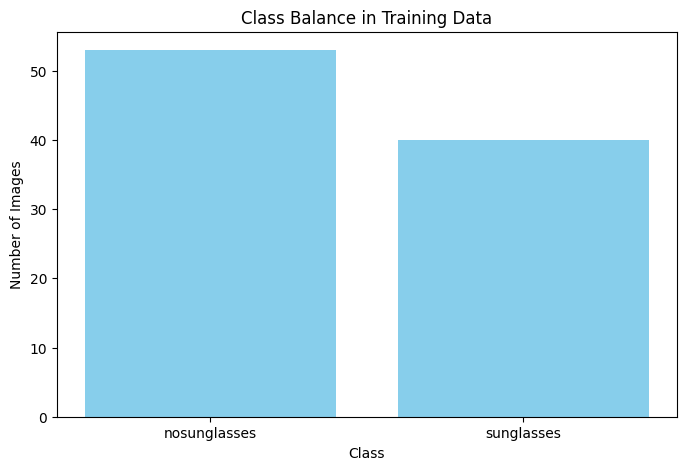

In [23]:
import matplotlib.pyplot as plt

# Step 1: Get class indices
class_indices = train_data.class_indices
print("Class Indices:", class_indices)

# Step 2: Count number of images per class
# flow_from_directory keeps filenames in train_data.filenames
filenames = train_data.filenames
labels = [f.split("/")[0] for f in filenames]

from collections import Counter
class_counts = Counter(labels)
print("Class Counts:", class_counts)

# Step 3: Visualize class balance
plt.figure(figsize=(8,5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Class Balance in Training Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


In [25]:
test_data = train_test_datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 23 images belonging to 2 classes.


In [26]:
# Step 6: Build a simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Step 7: Train the model
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30  # CHANGE if needed
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 9s/step - accuracy: 0.5168 - loss: 0.7519 - val_accuracy: 0.5652 - val_loss: 0.7452
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5542 - loss: 0.7217 - val_accuracy: 0.5652 - val_loss: 0.6908
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.4084 - loss: 0.6992 - val_accuracy: 0.5652 - val_loss: 0.6921
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5131 - loss: 0.6913 - val_accuracy: 0.5652 - val_loss: 0.6857
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5581 - loss: 0.6915 - val_accuracy: 0.5652 - val_loss: 0.6857
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5749 - loss: 0.6756 - val_accuracy: 0.5652 - val_loss: 0.6901
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5727 - loss: 0.6862 - val_accuracy: 0.5652 - val_loss: 0.6879
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5813 - loss: 0.6799 - val_accuracy: 0.5652 - val_loss: 0.6865
Epoch 9/

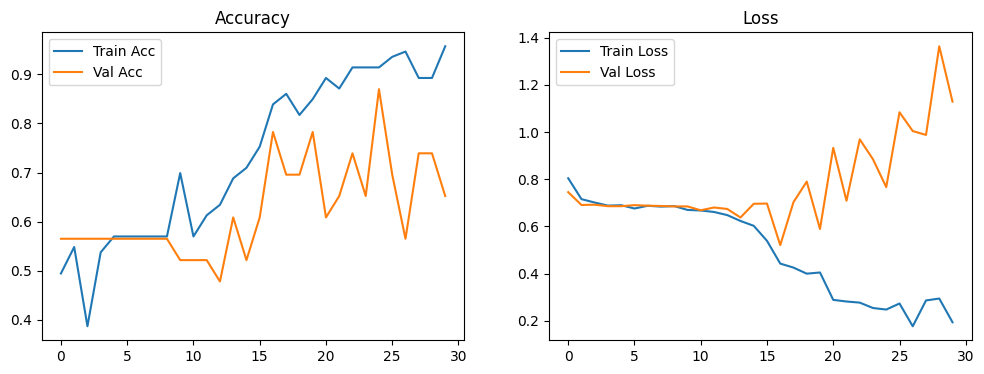

In [30]:
# Step 8: Plot training results
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [31]:
# Step 8: Evaluate on test data - Utlimate Model Exam
# Assuming you have a separate test_generator
print("Evaluating on test data... EXAM HALL")
test_loss, test_accuracy = model.evaluate(test_data)
print("Done with EXAM. Generating report...")
print(f"\n--- Model Progress Report ---")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]*100:.2f}%")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


Evaluating on test data... EXAM HALL
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6522 - loss: 1.0874
Done with EXAM. Generating report...

--- Model Progress Report ---
Final Training Accuracy: 95.70%
Final Validation Accuracy: 65.22%
Test Accuracy: 65.22%
Test Loss: 1.0874


In [ ]:
# Step 9: Test on new images
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_idx = np.argmax(pred)
    print(f"Predicted Class: {class_names[class_idx]} with confidence {pred[0][class_idx]*100:.2f}%")


In [32]:
# Step 1: Install required libraries
!pip install pyheif pillow

# Step 2: Import libraries
import pyheif
from PIL import Image
import os

# Step 3: Define converter function
def heic_to_png(folder_path):
    """
    Converts all .heic images in the folder to .png
    """
    files = [f for f in os.listdir(folder_path) if f.lower().endswith('.heic')]
    if not files:
        print("No HEIC files found in folder.")
        return

    output_folder = os.path.join(folder_path, "converted_png")
    os.makedirs(output_folder, exist_ok=True)

    for f in files:
        heic_path = os.path.join(folder_path, f)
        png_path = os.path.join(output_folder, f.replace(".heic", ".png").replace(".HEIC", ".png"))

        heif_file = pyheif.read(heic_path)
        image = Image.frombytes(
            heif_file.mode,
            heif_file.size,
            heif_file.data,
            "raw",
            heif_file.mode,
            heif_file.stride,
        )
        image.save(png_path, "PNG")
        print(f"Converted {f} -> {png_path}")

    print(f"\nAll HEIC images converted to PNG in folder: {output_folder}")

# Example usage
test_folder = "/content/drive/MyDrive/Dataset-usecase/test"
heic_to_png(test_folder)


Converted IMG_5876.HEIC -> /content/drive/MyDrive/Dataset-usecase/test/converted_png/IMG_5876.png
Converted IMG_5877.HEIC -> /content/drive/MyDrive/Dataset-usecase/test/converted_png/IMG_5877.png


KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


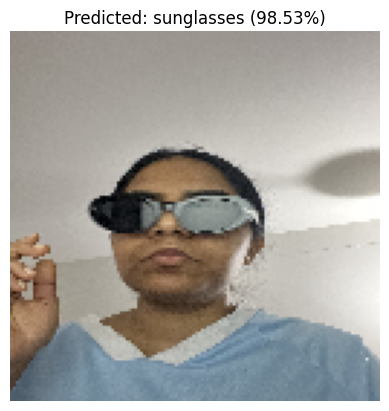

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


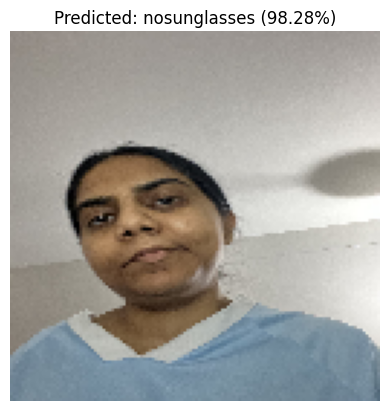

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


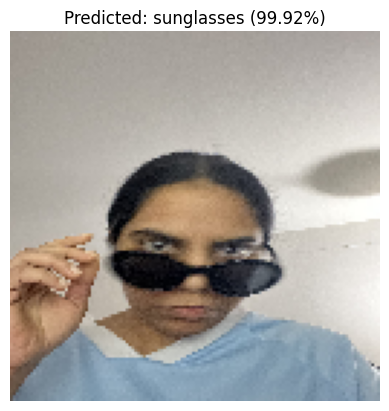

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


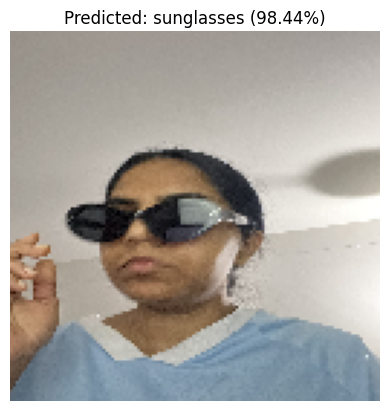

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


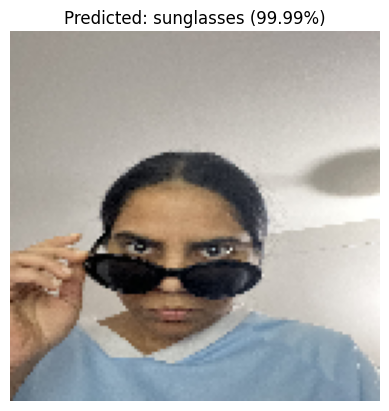

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


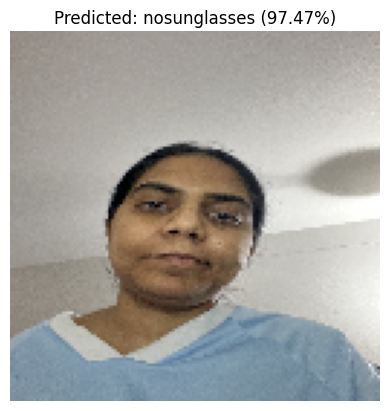

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


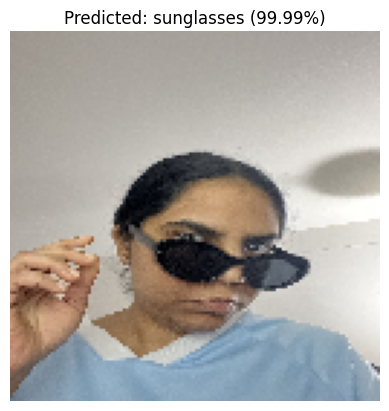

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


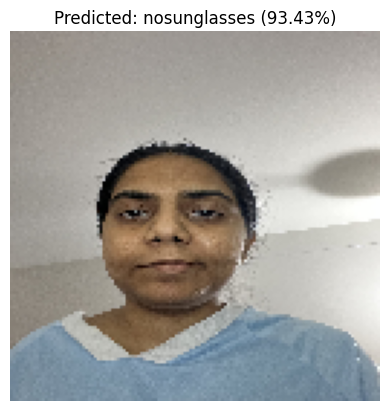

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


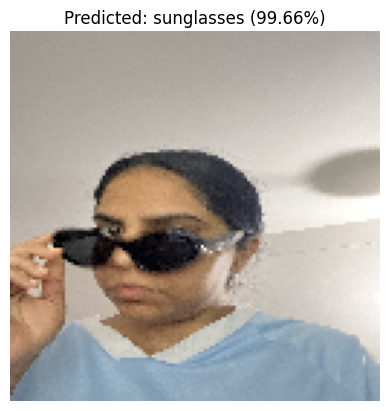

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


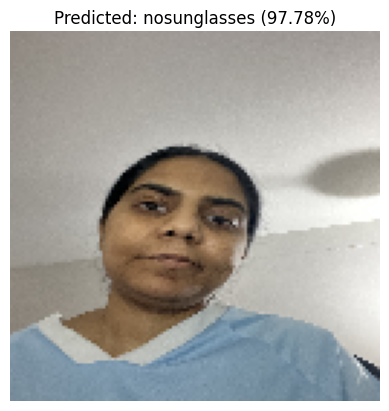

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


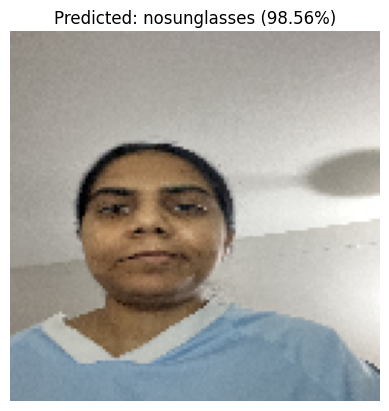

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


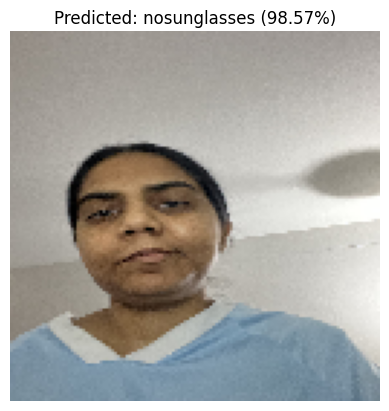

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7c2404150130>

In [33]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

class_names = ["nosunglasses", "sunglasses"]

def predict_images_in_folder(folder_path, true_labels=None):
    """
    Predicts all images in a folder and displays each image with predicted class & confidence.
    If true_labels dict is provided, calculates accuracy.

    Args:
        folder_path: path to folder containing images
        true_labels: Optional. Dictionary {filename: true_class_name} for accuracy calculation
    """
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    correct = 0
    total = len(files)

    for f in files:
        img_path = os.path.join(folder_path, f)
        # Load image
        img = image.load_img(img_path, target_size=(128,128))
        img_array = image.img_to_array(img)/255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        pred = model.predict(img_array)
        class_idx = np.argmax(pred)
        confidence = pred[0][class_idx]*100
        predicted_class = class_names[class_idx]

        # Display image and prediction
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
        plt.show()

        # Check accuracy if true label provided
        if true_labels:
            if f in true_labels and true_labels[f] == predicted_class:
                correct += 1

    # Print overall accuracy if true labels exist
    if true_labels:
        accuracy = (correct/total)*100
        print(f"\nPrediction Accuracy on folder: {accuracy:.2f}% ({correct}/{total} correct)")
    else:
        print(f"\nTotal images predicted: {total}")

# Example usage:
folder_path = "/content/drive/MyDrive/Dataset-usecase/test/converted_png"
predict_images_in_folder(folder_path, class_names)
